In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import netCDF4 as nc
from scipy.interpolate import interp1d
import matplotlib.cm as cm
from salishsea_tools import (nc_tools, gsw_calls, geo_tools, viz_tools)
import seabird
import cmocean as cmo
from datetime import (
    datetime,
    timedelta,
)
from matplotlib.dates import date2num, DateFormatter

import pandas as pd

In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

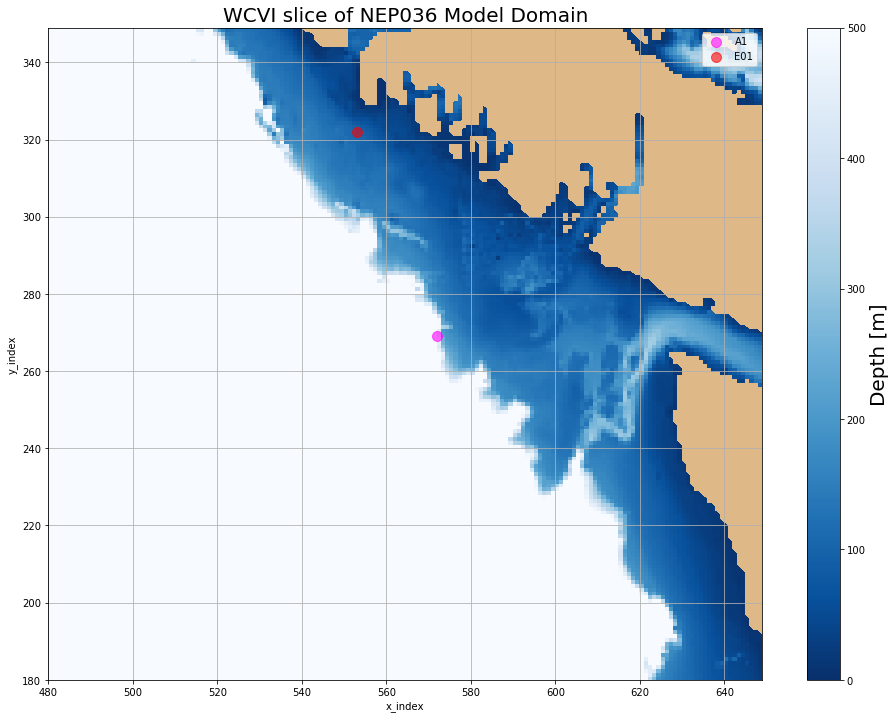

In [5]:
bathy = nc.Dataset('/data/mdunphy/NEP036-N30-OUT/INV/Bathymetry_EastCoast_NEMO_R036_GEBCO_corr_v14.nc')


Z = bathy.variables['Bathymetry']

y_wcvi_slice = np.arange(180,350)
x_wcvi_slice = np.arange(480,650)



lon_model = bathy['nav_lon'][...]
lat_model = bathy['nav_lat'][...]


cmap = plt.get_cmap('Blues_r')

cmap.set_bad('burlywood')
fig, ax = plt.subplots(1, 1, figsize=(16,12)); ax.grid()
p = ax.pcolormesh(x_wcvi_slice,y_wcvi_slice,Z[y_wcvi_slice,x_wcvi_slice], cmap=cmap, vmin=0, vmax=500)




lon_A1 = -126.20433
lat_A1 = 48.52958

j, i = geo_tools.find_closest_model_point(lon_A1,lat_A1,\
                                          lon_model,lat_model,grid='NEMO',tols=\
                                          {'NEMO': {'tol_lon': 0.1, 'tol_lat': 0.1},\
                                           'GEM2.5': {'tol_lon': 0.1, 'tol_lat': 0.1}})      
ax.scatter(i, j, c='magenta', s=100, alpha=0.6, label = 'A1')

lon_E01 = -126.60397
lat_E01 = 49.28883

y, x = geo_tools.find_closest_model_point(lon_E01,lat_E01,\
                                          lon_model,lat_model,grid='NEMO',tols=\
                                          {'NEMO': {'tol_lon': 0.1, 'tol_lat': 0.1},\
                                           'GEM2.5': {'tol_lon': 0.1, 'tol_lat': 0.1}})
ax.scatter(x, y, c='red', s=100, alpha=0.6, label = 'E01')

legend = ax.legend(loc='best', fancybox=True, framealpha=0.8)
ax.set_xlabel('x_index')
ax.set_ylabel('y_index')
ax.set_title('WCVI slice of NEP036 Model Domain', fontsize=20)
viz_tools.plot_land_mask(ax, bathy, yslice=y_wcvi_slice, xslice=x_wcvi_slice, color='burlywood')
cbar = fig.colorbar(p, ax=ax)
cbar.ax.set_ylabel('Depth [m]', fontsize=20)
ax.grid()


In [4]:
A1_data = pd.read_table('/data/ssahu/IOS_data/ADCP_E1_A1/a1_20150803_20160713_0493m.csv',delim_whitespace=1,header = None, skiprows=426)

str_stuff = np.array(['Record_Number', 'Date', 'Time', 'Pitch', 'Roll', 'Heading', 'Pressure', 'Temperature'], dtype = 'str')

bin_depths = np.array([84.44, 100.44, 116.44, 132.44, 148.44, 164.44, 180.44, 196.44, 212.44, 228.44, 244.44, 260.44, 276.44\
              , 292.44, 308.44, 324.44, 340.44, 356.44, 372.44, 388.44, 404.44, 420.44, 436.44, 452.44, 468.44], dtype = 'str')

variables = np.array(['vel_north', 'vel_east', 'vel_vert', 'back_scatter_mean'], dtype = 'str')

column_data = []

for j in bin_depths:
    for i in variables:
        column_data = np.append(arr=column_data, values=i+'_'+j)
    

columns_A1 = np.concatenate((str_stuff, column_data), axis = 0)

A1_data.columns = columns_A1

In [5]:
A1_data.tail(10)

,Record_Number,Date,Time,Pitch,Roll,Heading,Pressure,Temperature,vel_north_84.44,vel_east_84.44,...,vel_vert_436.44,back_scatter_mean_436.44,vel_north_452.44,vel_east_452.44,vel_vert_452.44,back_scatter_mean_452.44,vel_north_468.44,vel_east_468.44,vel_vert_468.44,back_scatter_mean_468.44
16545,16546.0,2016/07/13,12:20:51,-1.24,0.26,130.44,509.115,4.77,-0.111931,-0.130940,...,0.003,192.25,-0.002802,0.068097,0.004,200.25,-0.010748,0.011379,0.009,198.75
16546,16547.0,2016/07/13,12:50:51,-1.09,0.27,131.50,507.959,4.80,-0.017603,-0.284218,...,-0.002,194.25,-0.067592,0.037045,0.000,202.50,-0.041978,0.014485,0.000,200.25
16547,16548.0,2016/07/13,13:20:51,-0.99,0.26,132.24,509.217,4.74,-0.038412,-0.270654,...,-0.010,191.50,-0.079873,-0.005313,-0.016,199.50,-0.079060,-0.032226,-0.020,197.50
16548,16549.0,2016/07/13,13:50:51,-0.87,0.20,133.02,508.788,4.78,0.017074,-0.177647,...,-0.008,196.25,-0.008868,-0.022525,-0.009,199.50,-0.086466,-0.014615,-0.018,197.75
16549,16550.0,2016/07/13,14:20:51,-0.76,0.17,133.00,509.021,4.80,-0.004040,-0.208047,...,0.001,193.25,0.009429,-0.024312,0.000,202.50,-0.050972,-0.045682,0.000,198.75
16550,16551.0,2016/07/13,14:50:51,-0.68,0.19,133.81,508.602,4.85,0.097454,-0.187850,...,-0.001,194.00,-0.016437,-0.021676,0.005,202.00,0.045283,0.012627,0.007,198.50
16551,16552.0,2016/07/13,15:20:51,-0.58,0.15,134.78,508.941,4.78,0.085985,-0.201759,...,0.003,194.00,0.018009,-0.000830,-0.004,199.50,0.008111,-0.037245,-0.002,198.75
16552,16553.0,2016/07/13,15:50:51,-0.48,0.10,134.73,508.218,4.77,0.038568,-0.145043,...,-0.007,192.75,0.022904,-0.006665,-0.004,200.25,0.011687,-0.000650,-0.012,197.75
16553,16554.0,2016/07/13,16:20:51,-0.40,-0.04,134.00,508.507,4.75,0.057352,-0.096544,...,0.003,195.75,-0.000687,0.009194,0.003,201.00,0.019273,-0.011939,-0.002,198.25
16554,16555.0,2016/07/13,16:50:51,-0.45,-0.08,134.39,507.680,4.74,0.041385,-0.112855,...,0.005,195.25,-0.022814,0.009826,-0.005,204.25,-0.020917,0.020844,-0.011,199.50


In [6]:
vel_north_84 = np.array(A1_data['vel_north_84.44'], dtype = np.float)[:4320]
vel_east_84  = np.array(A1_data['vel_east_84.44'], dtype = np.float)[:4320]
mag_84       = np.sqrt(vel_east_84**2,vel_north_84**2)

vel_north_148 = np.array(A1_data['vel_north_148.44'], dtype = np.float)[:4320]
vel_east_148  = np.array(A1_data['vel_east_148.44'], dtype = np.float)[:4320]
mag_148       = np.sqrt(vel_east_148**2,vel_north_148**2)

vel_north_196 = np.array(A1_data['vel_north_196.44'], dtype = np.float)[:4320]
vel_east_196  = np.array(A1_data['vel_east_196.44'], dtype = np.float)[:4320]
mag_196      = np.sqrt(vel_east_196**2,vel_north_196**2)

vel_north_228 = np.array(A1_data['vel_north_228.44'], dtype = np.float)[:4320]
vel_east_228 = np.array(A1_data['vel_east_228.44'], dtype = np.float)[:4320]
mag_228      = np.sqrt(vel_east_228**2,vel_north_228**2)

vel_north_260 = np.array(A1_data['vel_north_260.44'], dtype = np.float)[:4320]
vel_east_260 = np.array(A1_data['vel_east_260.44'], dtype = np.float)[:4320]
mag_260      = np.sqrt(vel_east_260**2,vel_north_260**2)

In [7]:
tarikh = np.array(A1_data['Date'], dtype = np.str)
samai  = np.array(A1_data['Time'], dtype = np.str)

time = np.empty_like(tarikh)

for i in np.arange(tarikh.shape[0]):
    time[i] = tarikh[i] + '' + samai[i]


datetime_A1 = np.empty_like(time)

for i in np.arange(datetime_A1.shape[0]):
    datetime_A1[i] = datetime.strptime(time[i], '%Y/%m/%d%H:%M:%S')
    
datetime_A1 = datetime_A1.astype(np.datetime64)


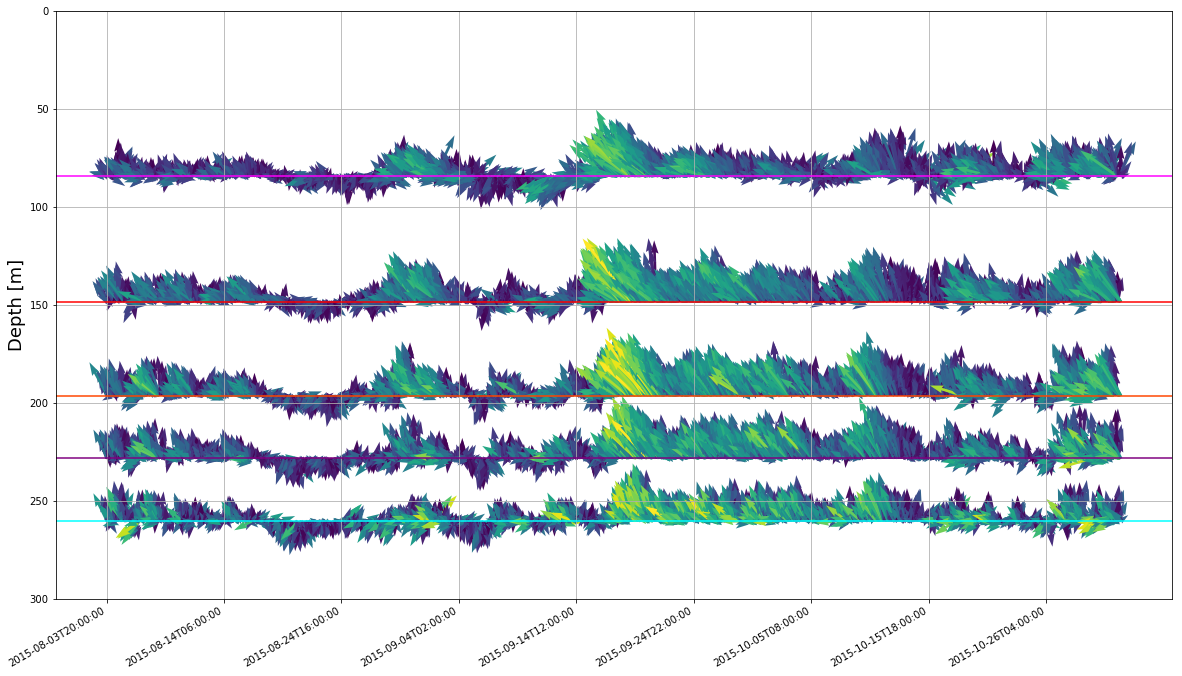

In [8]:
step = 1

# u_84 = vel_east_84[:4320]
# v_84 = vel_north_84[:4320]
# mag_84 = np.sqrt(u_84**2,v_84**2)





time_axis = datetime_A1[:4320]
time_tick = time_axis[::step]
time_axis_quiver = np.arange(0,4320,step)



fig, ax = plt.subplots(1, 1, figsize=(20,12))


ax.quiver(time_axis_quiver, 84.44, vel_east_84[::step], vel_north_84[::step], mag_84[::step], angles='uv', scale_units='inches', scale=0.5)# , minshaft = 3)
ax.axhline(y=84.44, color='magenta', label = '84 m')

ax.quiver(time_axis_quiver, 148.44, vel_east_148[::step], vel_north_148[::step], mag_148[::step], angles='uv', scale_units='inches', scale=0.5)# , minshaft = 3)
ax.axhline(y=148.44, color='red', label = '148 m')

ax.quiver(time_axis_quiver, 196.44, vel_east_196[::step], vel_north_196[::step], mag_196[::step], angles='uv', scale_units='inches', scale=0.5)# , minshaft = 3)
ax.axhline(y=196.44, color='orangered', label = '196 m')

ax.quiver(time_axis_quiver, 260.44, vel_east_260[::step], vel_north_260[::step], mag_260[::step], angles='uv', scale_units='inches', scale=0.5)# , minshaft = 3)
ax.axhline(y=260.44, color='cyan', label = '196 m')

ax.quiver(time_axis_quiver, 228.44, vel_east_228[::step], vel_north_228[::step], mag_228[::step], angles='uv', scale_units='inches', scale=0.5)# , minshaft = 3)
ax.axhline(y=228.44, color='purple', label = '228 m')

ax.set_ylabel('Depth [m]', fontsize =18)
plt.xticks(time_axis_quiver[::500], time_tick[::500])
ax.format_xdata = DateFormatter('%Y-%m-%d')
fig.autofmt_xdate()
ax.set_ylim(0, 300)
ax.invert_yaxis()
# legend = ax.legend(loc='best', fancybox=True, framealpha=0.75, fontsize = 18)
ax.grid() 

In [9]:
vel_north_84 = np.array(A1_data['vel_north_84.44'], dtype = np.float)[:2420]
vel_east_84  = np.array(A1_data['vel_east_84.44'], dtype = np.float)[:2420]
mag_84       = np.sqrt(vel_east_84**2,vel_north_84**2)

vel_north_148 = np.array(A1_data['vel_north_148.44'], dtype = np.float)[:2420]
vel_east_148  = np.array(A1_data['vel_east_148.44'], dtype = np.float)[:2420]
mag_148       = np.sqrt(vel_east_148**2,vel_north_148**2)

vel_north_196 = np.array(A1_data['vel_north_196.44'], dtype = np.float)[:2420]
vel_east_196  = np.array(A1_data['vel_east_196.44'], dtype = np.float)[:2420]
mag_196      = np.sqrt(vel_east_196**2,vel_north_196**2)

vel_north_228 = np.array(A1_data['vel_north_228.44'], dtype = np.float)[:2420]
vel_east_228 = np.array(A1_data['vel_east_228.44'], dtype = np.float)[:2420]
mag_228      = np.sqrt(vel_east_228**2,vel_north_228**2)

vel_north_260 = np.array(A1_data['vel_north_260.44'], dtype = np.float)[:2420]
vel_east_260 = np.array(A1_data['vel_east_260.44'], dtype = np.float)[:2420]
mag_260      = np.sqrt(vel_east_260**2,vel_north_260**2)

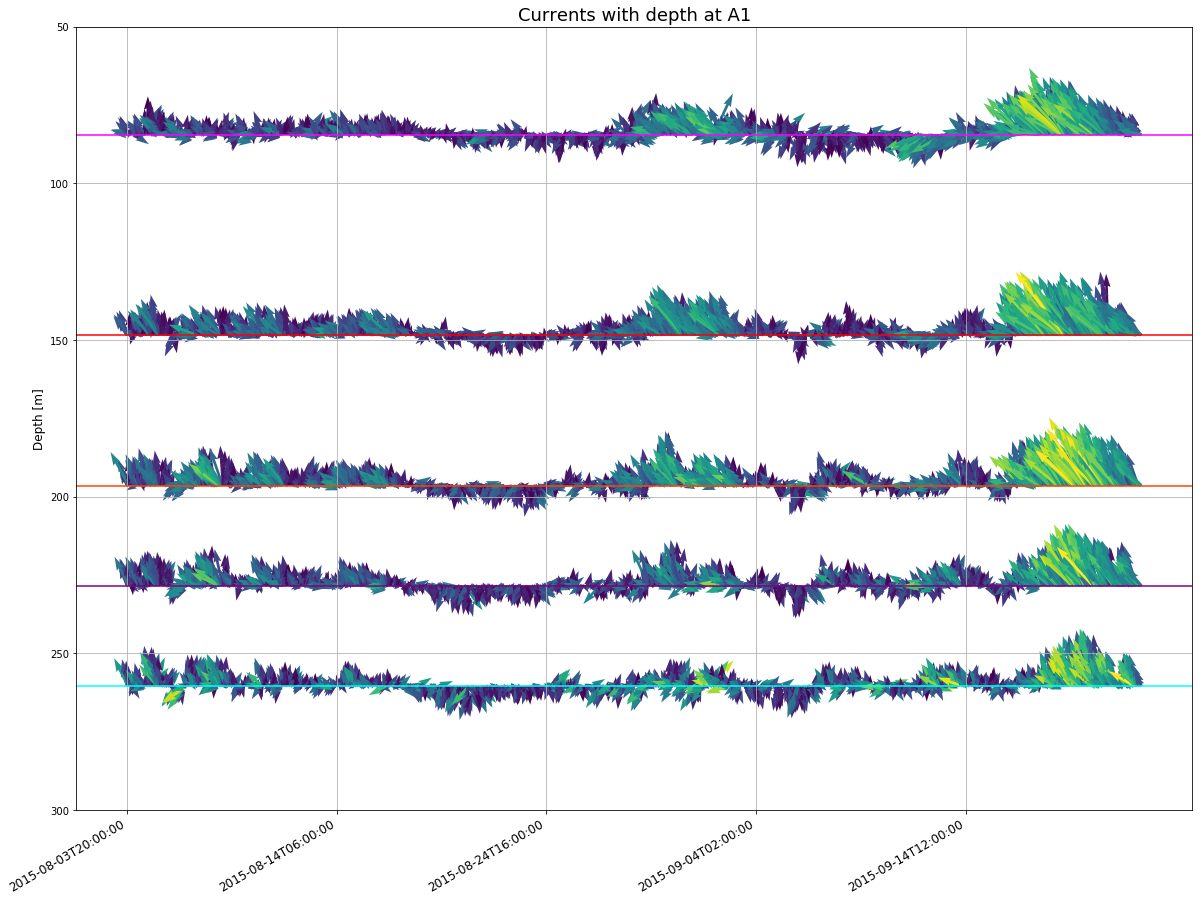

In [10]:
step = 1

# u_84 = vel_east_84[:4320]
# v_84 = vel_north_84[:4320]
# mag_84 = np.sqrt(u_84**2,v_84**2)





time_axis = datetime_A1[:2420]
time_tick = time_axis[::step]
time_axis_quiver = np.arange(0,2420,step)



fig, ax = plt.subplots(1, 1, figsize=(20,16))


ax.quiver(time_axis_quiver, 84.44, vel_east_84[::step], vel_north_84[::step], mag_84[::step], angles='uv', scale_units='inches', scale=0.5)# , minshaft = 3)
ax.axhline(y=84.44, color='magenta', label = '84 m')

ax.quiver(time_axis_quiver, 148.44, vel_east_148[::step], vel_north_148[::step], mag_148[::step], angles='uv', scale_units='inches', scale=0.5)# , minshaft = 3)
ax.axhline(y=148.44, color='red', label = '148 m')

ax.quiver(time_axis_quiver, 196.44, vel_east_196[::step], vel_north_196[::step], mag_196[::step], angles='uv', scale_units='inches', scale=0.5)# , minshaft = 3)
ax.axhline(y=196.44, color='orangered', label = '196 m')

ax.quiver(time_axis_quiver, 260.44, vel_east_260[::step], vel_north_260[::step], mag_260[::step], angles='uv', scale_units='inches', scale=0.5)# , minshaft = 3)
ax.axhline(y=260.44, color='cyan', label = '196 m')

ax.quiver(time_axis_quiver, 228.44, vel_east_228[::step], vel_north_228[::step], mag_228[::step], angles='uv', scale_units='inches', scale=0.5)# , minshaft = 3)
ax.axhline(y=228.44, color='purple', label = '228 m')

ax.set_ylabel('Depth [m]', fontsize =12)
plt.xticks(time_axis_quiver[::500], time_tick[::500], fontsize =12)
ax.format_xdata = DateFormatter('%Y-%m-%d')
fig.autofmt_xdate()
ax.set_ylim(50, 300)
ax.invert_yaxis()
ax.set_title('Currents with depth at A1', fontsize =18)
# legend = ax.legend(loc='best', fancybox=True, framealpha=0.75, fontsize = 18)
ax.grid() 

In [6]:
def U_timeseries_at_WCVI_locations(grid_U):
    u_vel = grid_U.variables['vozocrtx'][0,:, y_wcvi_slice[:], x_wcvi_slice[:]]
    
    vector_u = namedtuple('vector_u', 'u_vel')

    return vector_u(u_vel)


def V_timeseries_at_WCVI_locations(grid_V):
    
    v_vel = grid_V.variables['vomecrty'][0,:, y_wcvi_slice[:], x_wcvi_slice[:]]
    
    vector_v = namedtuple('vector_v', 'v_vel')

    return vector_v(v_vel)

In [3]:
bathy = nc.Dataset('/data/mdunphy/NEP036-N30-OUT/INV/Bathymetry_EastCoast_NEMO_R036_GEBCO_corr_v14.nc')

mesh_mask = nc.Dataset('/data/mdunphy/NEP036-N30-OUT/INV/mesh_mask.nc')

mbathy = mesh_mask['mbathy'][0,...]

Z = bathy.variables['Bathymetry'][:]

y_wcvi_slice = np.arange(180,350)
x_wcvi_slice = np.arange(480,650)

zlevels = nc.Dataset('/data/mdunphy/NEP036-N30-OUT/CDF_COMB_COMPRESSED/NEP036-N30_IN_20140915_00001440_grid_T.nc').variables['deptht']


lon = bathy['nav_lon'][...]
lat = bathy['nav_lat'][...]


short_NEP_iso_jul = nc.Dataset('/data/ssahu/NEP36_Extracted_Months/short_slice_NEP36_jul_along_isopycnal_larger_offshore_rho_correct.nc')

short_spic_iso_jul = short_NEP_iso_jul.variables['spiciness']
short_iso_t = short_NEP_iso_jul.variables['isot']


short_NEP_iso_aug = nc.Dataset('/data/ssahu/NEP36_Extracted_Months/short_NEP36_aug_along_isopycnal_larger_offahore_rho_correct.nc')

short_spic_iso_aug = short_NEP_iso_aug.variables['spiciness']
short_iso_t = short_NEP_iso_aug.variables['isot']


short_NEP_iso_jun = nc.Dataset('/data/ssahu/NEP36_Extracted_Months/short_NEP36_june_along_isopycnal_larger_offshore_rho_correct.nc')

short_spic_iso_jun = short_NEP_iso_jun.variables['spiciness']
short_iso_t = short_NEP_iso_jun.variables['isot']

lon_spic_file = lon[180:350,480:650]
lat_spic_file = lat[180:350,480:650]


lon_A1 = -126.20433
lat_A1 = 48.52958

j, i = geo_tools.find_closest_model_point(lon_A1,lat_A1,\
                                          lon_spic_file,lat_spic_file,grid='NEMO',tols=\
                                          {'NEMO': {'tol_lon': 0.1, 'tol_lat': 0.1},\
                                           'GEM2.5': {'tol_lon': 0.1, 'tol_lat': 0.1}}) 

lon_E01 = -126.60397
lat_E01 = 49.28883

y, x = geo_tools.find_closest_model_point(lon_E01,lat_E01,\
                                          lon_spic_file,lat_spic_file,grid='NEMO',tols=\
                                          {'NEMO': {'tol_lon': 0.1, 'tol_lat': 0.1},\
                                           'GEM2.5': {'tol_lon': 0.1, 'tol_lat': 0.1}}) 


In [ ]:
NEP_Jun_u = nc.Dataset('/data/ssahu/NEP36_Extracted_Months/')

In [41]:

spic_A1_jun_26_4 = short_spic_iso_jun[:,4,j,i]

spic_A1_jul_26_4 = short_spic_iso_jul[:,4,j,i]

spic_A1_aug_26_4 = short_spic_iso_aug[:,4,j,i]

spic_3_months_A1_26_4 = np.concatenate((spic_A1_jun_26_4, spic_A1_jul_26_4, spic_A1_aug_26_4), axis = 0)


spic_A1_jun_26_3 = short_spic_iso_jun[:,3,j,i]

spic_A1_jul_26_3 = short_spic_iso_jul[:,3,j,i]

spic_A1_aug_26_3 = short_spic_iso_aug[:,3,j,i]

spic_3_months_A1_26_3 = np.concatenate((spic_A1_jun_26_3, spic_A1_jul_26_3, spic_A1_aug_26_3), axis =0)


date1 = '2015-06-01'
date2 = '2015-08-31'
mydates = np.array(pd.date_range(date1, date2))

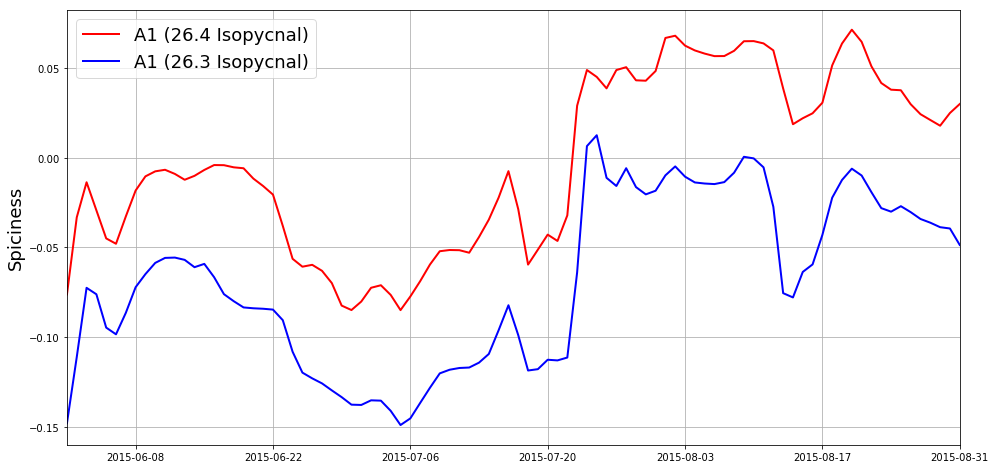

In [42]:

 
# Make plots
fig, (ax) = plt.subplots(1, 1, figsize=(16,8))
ax.plot(mydates , spic_3_months_A1_26_4, 'r-',linewidth=2, label = 'A1 (26.4 Isopycnal)')
ax.plot(mydates , spic_3_months_A1_26_3, 'b-',linewidth=2, label = 'A1 (26.3 Isopycnal)')
legend = ax.legend(loc='best', fancybox=True, framealpha=0.75, fontsize = 18)
ax.set_ylabel('Spiciness', fontsize =18)
ax.set_xlim(mydates[0],mydates[-1])
#ax.set_xticklabels(date_time[3600:6808])
# ax2.set_ylim(-12,10)
ax.grid() 





In [43]:
lat_LB08 = 48.4217
lon_LB08 = -125.4775

j, i = geo_tools.find_closest_model_point(lon_LB08,lat_LB08,\
                                                  lon_spic_file,lat_spic_file,tols=\
                                                  {'NEMO': {'tol_lon': 0.1, 'tol_lat': 0.1},'\
                                                  GEM2.5': {'tol_lon': 0.1, 'tol_lat': 0.1}})

print(j,i)

84 119


In [44]:

spic_A1_jun_26_4 = short_spic_iso_jun[:,4,j,i]

spic_A1_jul_26_4 = short_spic_iso_jul[:,4,j,i]

spic_A1_aug_26_4 = short_spic_iso_aug[:,4,j,i]

spic_3_months_A1_26_4 = np.concatenate((spic_A1_jun_26_4, spic_A1_jul_26_4, spic_A1_aug_26_4), axis = 0)


spic_A1_jun_26_3 = short_spic_iso_jun[:,3,j,i]

spic_A1_jul_26_3 = short_spic_iso_jul[:,3,j,i]

spic_A1_aug_26_3 = short_spic_iso_aug[:,3,j,i]

spic_3_months_A1_26_3 = np.concatenate((spic_A1_jun_26_3, spic_A1_jul_26_3, spic_A1_aug_26_3), axis =0)


date1 = '2015-06-01'
date2 = '2015-08-31'
mydates = np.array(pd.date_range(date1, date2))

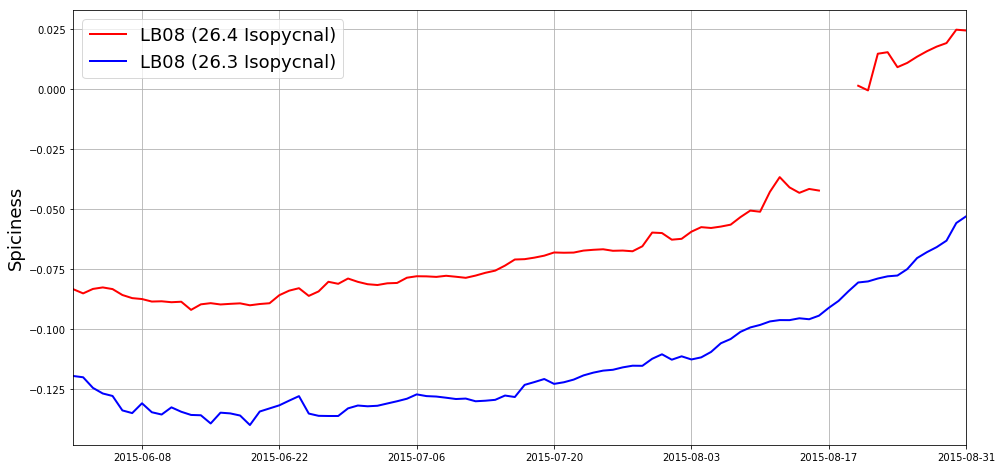

In [45]:

 
# Make plots
fig, (ax) = plt.subplots(1, 1, figsize=(16,8))
ax.plot(mydates , spic_3_months_A1_26_4, 'r-',linewidth=2, label = 'LB08 (26.4 Isopycnal)')
ax.plot(mydates , spic_3_months_A1_26_3, 'b-',linewidth=2, label = 'LB08 (26.3 Isopycnal)')
legend = ax.legend(loc='best', fancybox=True, framealpha=0.75, fontsize = 18)
ax.set_ylabel('Spiciness', fontsize =18)
ax.set_xlim(mydates[0],mydates[-1])
#ax.set_xticklabels(date_time[3600:6808])
# ax2.set_ylim(-12,10)
ax.grid() 





In [3]:
A1_data = pd.read_table('/data/ssahu/IOS_data/ADCP_E1_A1/e01_20150801_20160712_0091m.csv',delim_whitespace=1,header = None, skiprows=426)

str_stuff = np.array(['Record_Number', 'Date', 'Time', 'Pitch', 'Roll', 'Heading', 'Pressure', 'Temperature'], dtype = 'str')

bin_depths = np.array([12.95, 16.95, 20.95, 24.95, 28.95, 32.95, 36.95, 40.95, 44.95, 48.95, 52.95, 56.95, 60.95\
                       , 64.95, 68.95, 72.95, 76.95, 80.95, 84.95], dtype = 'str')

variables = np.array(['vel_north', 'vel_east', 'vel_vert', 'back_scatter_mean'], dtype = 'str')

column_data = []

for j in bin_depths:
    for i in variables:
        column_data = np.append(arr=column_data, values=i+'_'+j)
    

columns_A1 = np.concatenate((str_stuff, column_data), axis = 0)

A1_data.columns = columns_A1

In [8]:
A1_data.tail(10)

,Record_Number,Date,Time,Pitch,Roll,Heading,Pressure,Temperature,vel_north_12.95,vel_east_12.95,...,vel_vert_76.95,back_scatter_mean_76.95,vel_north_80.95,vel_east_80.95,vel_vert_80.95,back_scatter_mean_80.95,vel_north_84.95,vel_east_84.95,vel_vert_84.95,back_scatter_mean_84.95
16537,16607.0,2016/07/12,16:00:00,-1.20,0.49,310.64,93.331,7.15,0.185976,-0.275583,...,-0.001,112.00,0.064708,-0.149602,0.000,121.25,0.051731,-0.110697,-0.001,133.00
16538,16608.0,2016/07/12,16:30:00,-1.23,0.40,310.80,93.267,7.14,0.226347,-0.267385,...,-0.003,113.50,0.055390,-0.129449,-0.003,122.75,0.031513,-0.109576,-0.004,132.75
16539,16609.0,2016/07/12,17:00:00,-1.39,0.30,300.32,93.137,7.14,0.223301,-0.301791,...,0.000,115.50,0.055644,-0.092762,0.000,124.25,0.023584,-0.097364,-0.001,133.50
16540,16610.0,2016/07/12,17:30:00,-1.52,0.12,304.95,93.027,7.13,0.204358,-0.274129,...,0.000,116.25,0.037708,-0.088849,-0.001,124.75,-0.003924,-0.109984,0.000,134.25
16541,16611.0,2016/07/12,18:00:00,-1.71,-0.08,306.59,92.874,7.13,0.158926,-0.269235,...,-0.003,116.50,0.031768,-0.072889,-0.003,125.50,0.003291,-0.099404,-0.006,134.50
16542,16612.0,2016/07/12,18:30:00,-1.76,-0.15,309.55,92.737,7.15,0.162139,-0.293353,...,-0.005,115.00,0.027357,-0.072150,-0.005,125.50,0.005942,-0.094407,-0.004,136.00
16543,16613.0,2016/07/12,19:00:00,-1.86,-0.19,311.20,92.598,7.19,0.203530,-0.295303,...,-0.001,111.50,0.029767,-0.090238,-0.002,120.25,0.018358,-0.104197,-0.003,130.50
16544,16614.0,2016/07/12,19:30:00,-2.04,-0.39,311.68,92.476,7.21,0.198023,-0.287578,...,0.000,112.00,0.075963,-0.063519,0.000,120.25,0.041264,-0.059517,0.000,131.50
16545,16615.0,2016/07/12,20:00:00,-2.14,-0.35,314.96,92.394,7.23,0.162368,-0.283869,...,0.000,111.25,0.069207,-0.055131,-0.001,120.00,0.019645,-0.064055,0.001,129.75
16546,16616.0,2016/07/12,20:30:00,-2.17,-0.47,317.79,92.353,7.24,0.189355,-0.279776,...,-0.005,109.50,0.054368,-0.040854,-0.004,119.75,0.020461,-0.056483,-0.004,130.50


In [11]:
vel_north_12 = np.array(A1_data['vel_north_12.95'], dtype = np.float)[:4320]
vel_east_12  = np.array(A1_data['vel_east_12.95'], dtype = np.float)[:4320]
mag_12       = np.sqrt(vel_east_12**2,vel_north_12**2)

vel_north_44 = np.array(A1_data['vel_north_44.95'], dtype = np.float)[:4320]
vel_east_44  = np.array(A1_data['vel_east_44.95'], dtype = np.float)[:4320]
mag_44       = np.sqrt(vel_east_44**2,vel_north_44**2)

vel_north_60 = np.array(A1_data['vel_north_60.95'], dtype = np.float)[:4320]
vel_east_60  = np.array(A1_data['vel_east_60.95'], dtype = np.float)[:4320]
mag_60      = np.sqrt(vel_east_60**2,vel_north_60**2)

vel_north_72 = np.array(A1_data['vel_north_72.95'], dtype = np.float)[:4320]
vel_east_72 = np.array(A1_data['vel_east_72.95'], dtype = np.float)[:4320]
mag_72      = np.sqrt(vel_east_72**2,vel_north_72**2)

vel_north_84 = np.array(A1_data['vel_north_84.95'], dtype = np.float)[:4320]
vel_east_84 = np.array(A1_data['vel_east_84.95'], dtype = np.float)[:4320]
mag_84      = np.sqrt(vel_east_84**2,vel_north_84**2)

In [12]:
tarikh = np.array(A1_data['Date'], dtype = np.str)
samai  = np.array(A1_data['Time'], dtype = np.str)

time = np.empty_like(tarikh)

for i in np.arange(tarikh.shape[0]):
    time[i] = tarikh[i] + '' + samai[i]


datetime_A1 = np.empty_like(time)

for i in np.arange(datetime_A1.shape[0]):
    datetime_A1[i] = datetime.strptime(time[i], '%Y/%m/%d%H:%M:%S')
    
datetime_A1 = datetime_A1.astype(np.datetime64)


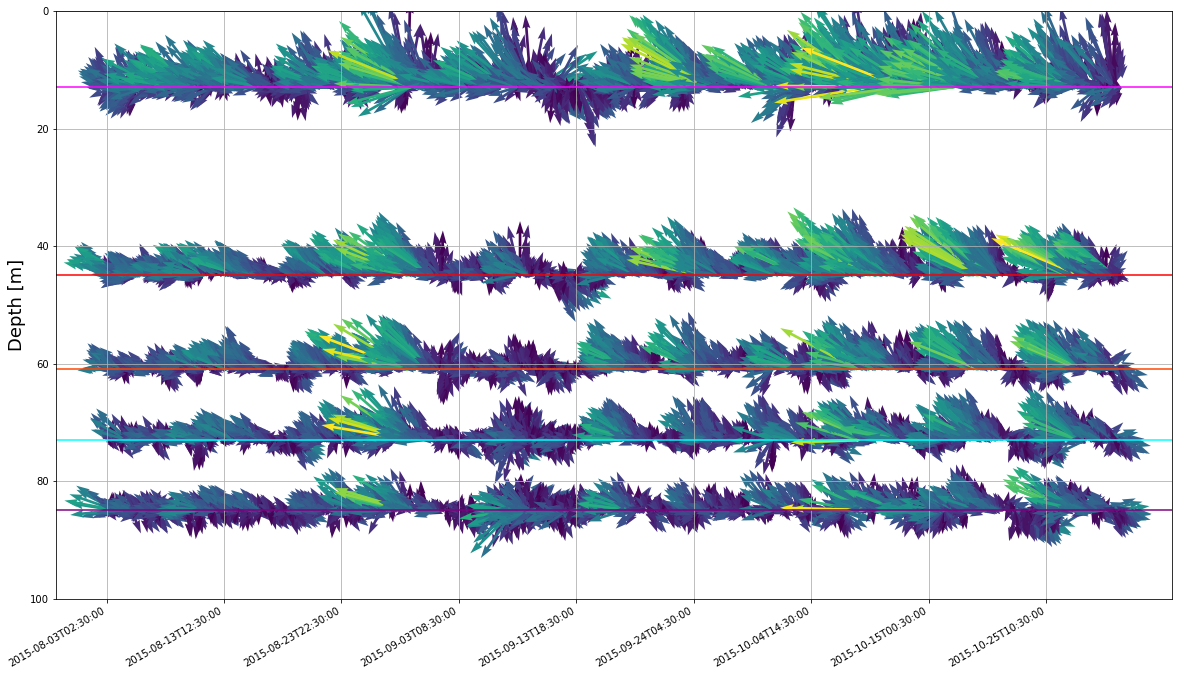

In [17]:
step = 1

# u_84 = vel_east_84[:4320]
# v_84 = vel_north_84[:4320]
# mag_84 = np.sqrt(u_84**2,v_84**2)





time_axis = datetime_A1[:4320]
time_tick = time_axis[::step]
time_axis_quiver = np.arange(0,4320,step)



fig, ax = plt.subplots(1, 1, figsize=(20,12))


ax.quiver(time_axis_quiver, 12.95, vel_east_12[::step], vel_north_12[::step], mag_12[::step], angles='uv', scale_units='inches', scale=0.5)# , minshaft = 3)
ax.axhline(y=12.95, color='magenta', label = '13 m')

ax.quiver(time_axis_quiver, 44.95, vel_east_44[::step], vel_north_44[::step], mag_44[::step], angles='uv', scale_units='inches', scale=0.5)# , minshaft = 3)
ax.axhline(y=44.95, color='red', label = '45 m')

ax.quiver(time_axis_quiver, 60.95, vel_east_60[::step], vel_north_60[::step], mag_60[::step], angles='uv', scale_units='inches', scale=0.5)# , minshaft = 3)
ax.axhline(y=60.95, color='orangered', label = '60.95 m')

ax.quiver(time_axis_quiver, 72.95, vel_east_72[::step], vel_north_72[::step], mag_72[::step], angles='uv', scale_units='inches', scale=0.5)# , minshaft = 3)
ax.axhline(y=72.95, color='cyan', label = '72 m')

ax.quiver(time_axis_quiver, 84.95, vel_east_84[::step], vel_north_84[::step], mag_84[::step], angles='uv', scale_units='inches', scale=0.5)# , minshaft = 3)
ax.axhline(y=84.95, color='purple', label = '84 m')

ax.set_ylabel('Depth [m]', fontsize =18)
plt.xticks(time_axis_quiver[::500], time_tick[::500])
ax.format_xdata = DateFormatter('%Y-%m-%d')
fig.autofmt_xdate()
ax.set_ylim(0, 100)
ax.invert_yaxis()
# legend = ax.legend(loc='best', fancybox=True, framealpha=0.75, fontsize = 18)
ax.grid() 

In [20]:

vel_north_12 = np.array(A1_data['vel_north_12.95'], dtype = np.float)[:2420]
vel_east_12  = np.array(A1_data['vel_east_12.95'], dtype = np.float)[:2420]
mag_12       = np.sqrt(vel_east_12**2,vel_north_12**2)

vel_north_44 = np.array(A1_data['vel_north_44.95'], dtype = np.float)[:2420]
vel_east_44  = np.array(A1_data['vel_east_44.95'], dtype = np.float)[:2420]
mag_44       = np.sqrt(vel_east_44**2,vel_north_44**2)

vel_north_60 = np.array(A1_data['vel_north_60.95'], dtype = np.float)[:2420]
vel_east_60  = np.array(A1_data['vel_east_60.95'], dtype = np.float)[:2420]
mag_60      = np.sqrt(vel_east_60**2,vel_north_60**2)

vel_north_72 = np.array(A1_data['vel_north_72.95'], dtype = np.float)[:2420]
vel_east_72 = np.array(A1_data['vel_east_72.95'], dtype = np.float)[:2420]
mag_72      = np.sqrt(vel_east_72**2,vel_north_72**2)

vel_north_84 = np.array(A1_data['vel_north_84.95'], dtype = np.float)[:2420]
vel_east_84 = np.array(A1_data['vel_east_84.95'], dtype = np.float)[:2420]
mag_84      = np.sqrt(vel_east_84**2,vel_north_84**2)

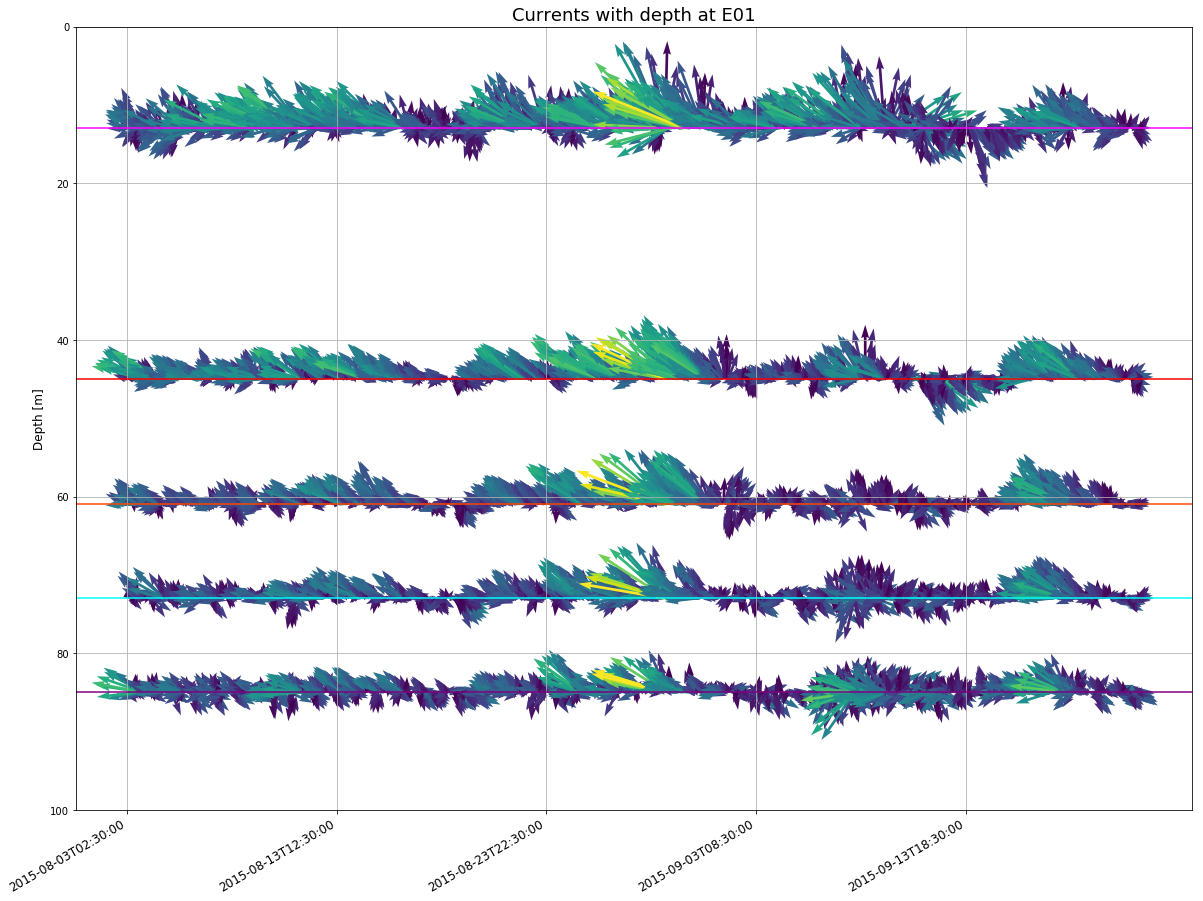

In [21]:
step = 1

# u_84 = vel_east_84[:4320]
# v_84 = vel_north_84[:4320]
# mag_84 = np.sqrt(u_84**2,v_84**2)





time_axis = datetime_A1[:2420]
time_tick = time_axis[::step]
time_axis_quiver = np.arange(0,2420,step)



fig, ax = plt.subplots(1, 1, figsize=(20,16))


ax.quiver(time_axis_quiver, 12.95, vel_east_12[::step], vel_north_12[::step], mag_12[::step], angles='uv', scale_units='inches', scale=0.5)# , minshaft = 3)
ax.axhline(y=12.95, color='magenta', label = '13 m')

ax.quiver(time_axis_quiver, 44.95, vel_east_44[::step], vel_north_44[::step], mag_44[::step], angles='uv', scale_units='inches', scale=0.5)# , minshaft = 3)
ax.axhline(y=44.95, color='red', label = '45 m')

ax.quiver(time_axis_quiver, 60.95, vel_east_60[::step], vel_north_60[::step], mag_60[::step], angles='uv', scale_units='inches', scale=0.5)# , minshaft = 3)
ax.axhline(y=60.95, color='orangered', label = '60.95 m')

ax.quiver(time_axis_quiver, 72.95, vel_east_72[::step], vel_north_72[::step], mag_72[::step], angles='uv', scale_units='inches', scale=0.5)# , minshaft = 3)
ax.axhline(y=72.95, color='cyan', label = '72 m')

ax.quiver(time_axis_quiver, 84.95, vel_east_84[::step], vel_north_84[::step], mag_84[::step], angles='uv', scale_units='inches', scale=0.5)# , minshaft = 3)
ax.axhline(y=84.95, color='purple', label = '84 m')

ax.set_ylabel('Depth [m]', fontsize =12)
plt.xticks(time_axis_quiver[::500], time_tick[::500], fontsize =12)
ax.format_xdata = DateFormatter('%Y-%m-%d')
fig.autofmt_xdate()
ax.set_ylim(0, 100)
ax.invert_yaxis()
ax.set_title('Currents with depth at E01', fontsize =18)
# legend = ax.legend(loc='best', fancybox=True, framealpha=0.75, fontsize = 18)
ax.grid() 

In [22]:

spic_A1_jun_26_4 = short_spic_iso_jun[:,4,y,x]

spic_A1_jul_26_4 = short_spic_iso_jul[:,4,y,x]

spic_A1_aug_26_4 = short_spic_iso_aug[:,4,y,x]

spic_3_months_A1_26_4 = np.concatenate((spic_A1_jun_26_4, spic_A1_jul_26_4, spic_A1_aug_26_4), axis = 0)


spic_A1_jun_26_3 = short_spic_iso_jun[:,3,y,x]

spic_A1_jul_26_3 = short_spic_iso_jul[:,3,y,x]

spic_A1_aug_26_3 = short_spic_iso_aug[:,3,y,x]

spic_3_months_A1_26_3 = np.concatenate((spic_A1_jun_26_3, spic_A1_jul_26_3, spic_A1_aug_26_3), axis =0)


date1 = '2015-06-01'
date2 = '2015-08-31'
mydates = np.array(pd.date_range(date1, date2))

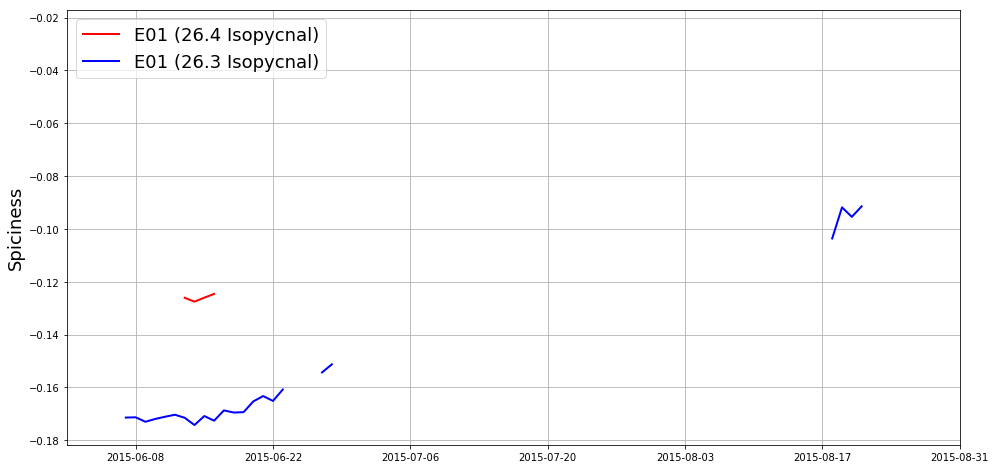

In [23]:

 
# Make plots
fig, (ax) = plt.subplots(1, 1, figsize=(16,8))
ax.plot(mydates , spic_3_months_A1_26_4, 'r-',linewidth=2, label = 'E01 (26.4 Isopycnal)')
ax.plot(mydates , spic_3_months_A1_26_3, 'b-',linewidth=2, label = 'E01 (26.3 Isopycnal)')
legend = ax.legend(loc='best', fancybox=True, framealpha=0.75, fontsize = 18)
ax.set_ylabel('Spiciness', fontsize =18)
ax.set_xlim(mydates[0],mydates[-1])
#ax.set_xticklabels(date_time[3600:6808])
# ax2.set_ylim(-12,10)
ax.grid() 





In [24]:
spic_A1_jun_26_4 = short_spic_iso_jun[:,0,y,x]

spic_A1_jul_26_4 = short_spic_iso_jul[:,0,y,x]

spic_A1_aug_26_4 = short_spic_iso_aug[:,0,y,x]

spic_3_months_A1_26_4 = np.concatenate((spic_A1_jun_26_4, spic_A1_jul_26_4, spic_A1_aug_26_4), axis = 0)

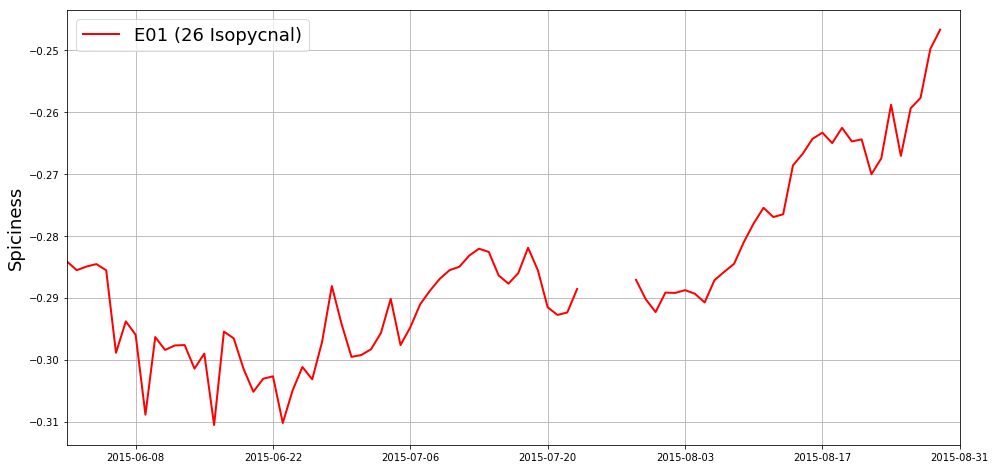

In [25]:

 
# Make plots
fig, (ax) = plt.subplots(1, 1, figsize=(16,8))
ax.plot(mydates , spic_3_months_A1_26_4, 'r-',linewidth=2, label = 'E01 (26 Isopycnal)')
# ax.plot(mydates , spic_3_months_A1_26_3, 'b-',linewidth=2, label = 'E01 (26.3 Isopycnal)')
legend = ax.legend(loc='best', fancybox=True, framealpha=0.75, fontsize = 18)
ax.set_ylabel('Spiciness', fontsize =18)
ax.set_xlim(mydates[0],mydates[-1])
#ax.set_xticklabels(date_time[3600:6808])
# ax2.set_ylim(-12,10)
ax.grid() 



